In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('cleaned_house_sales.csv')
df.head()

,house_id,city,sale_price,sale_date,months_listed,bedrooms,house_type,area
0,1217792,Silvertown,55943,2021-09-12,5.4,2,Semi-detached,107.8
1,1900913,Silvertown,384677,2021-01-17,6.3,5,Detached,498.8
2,1174927,Riverford,281707,2021-11-10,6.9,6,Detached,542.5
3,1773666,Silvertown,373251,2020-04-13,6.1,6,Detached,528.4
4,1258487,Silvertown,328885,2020-09-24,8.7,5,Detached,477.1


## Descriptive Analysis

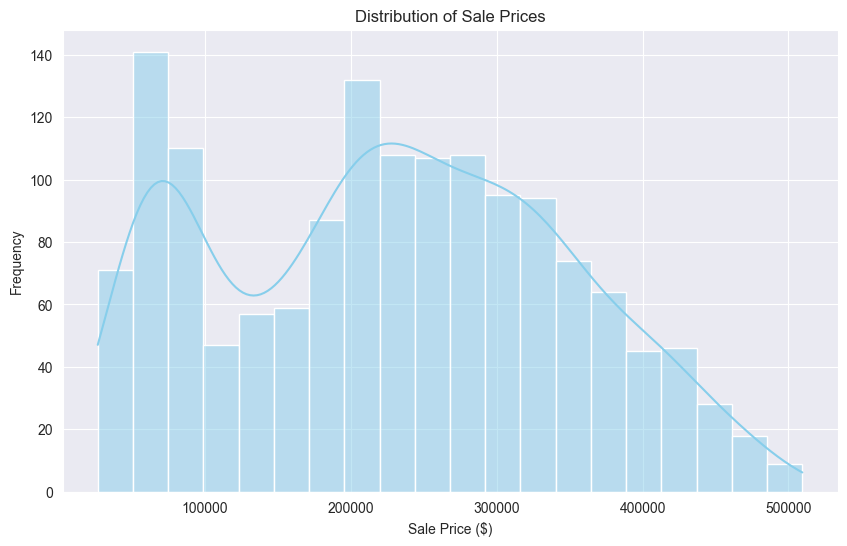

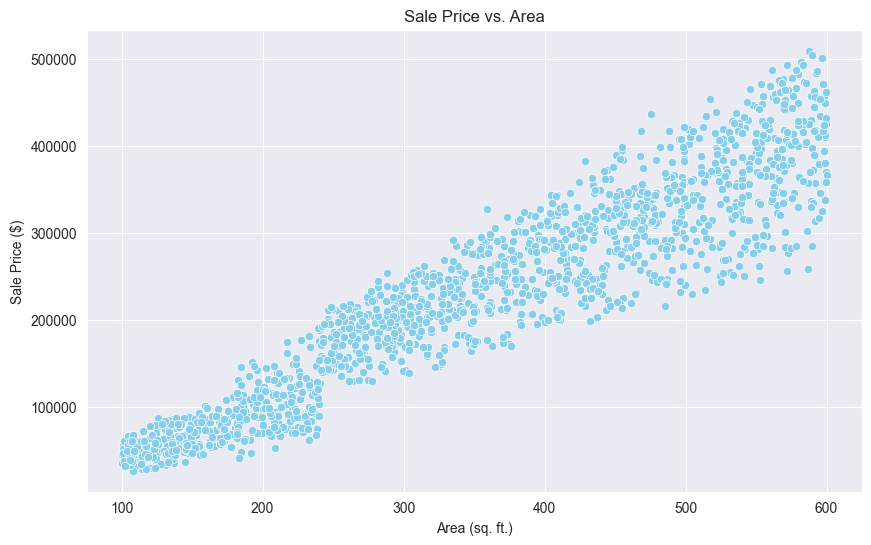

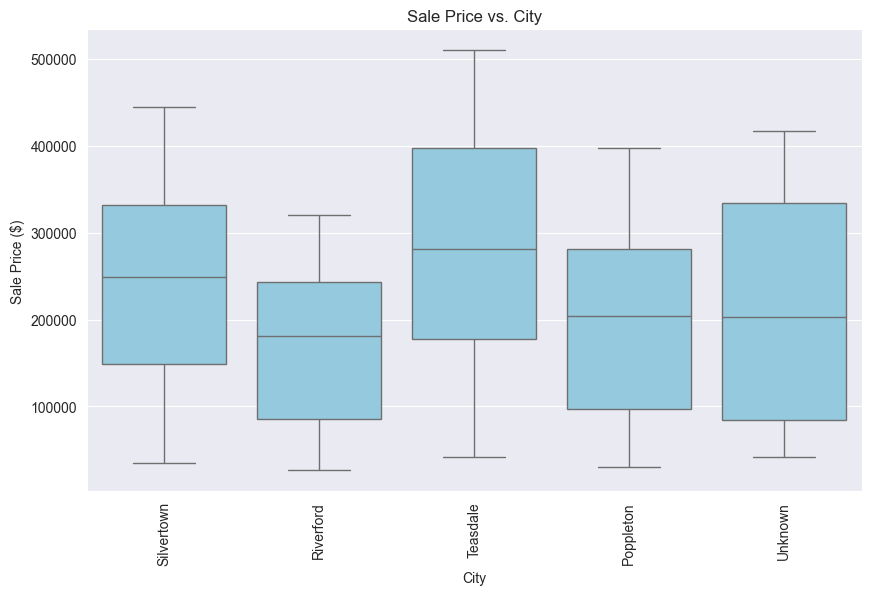

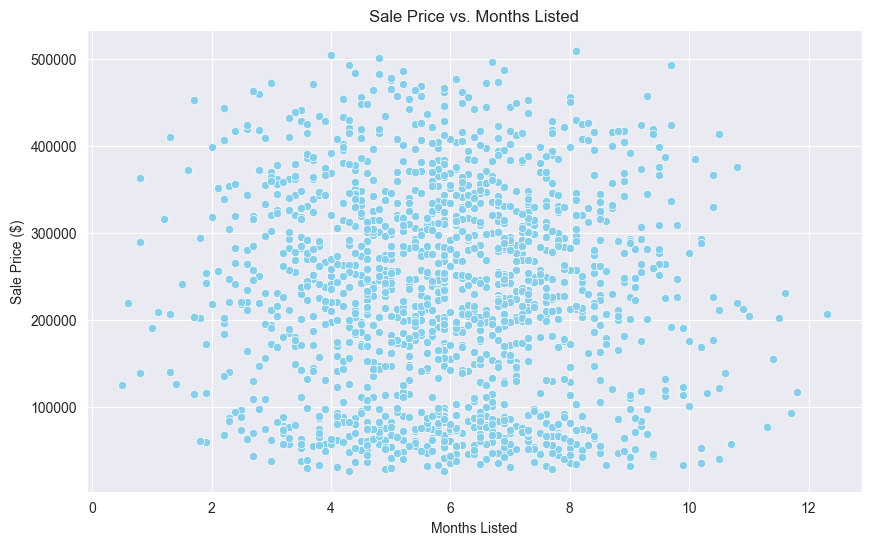

In [9]:
# Explore the distribution of sale prices
plt.figure(figsize=(10, 6))
sns.histplot(df['sale_price'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.show()

# Explore the correlation between sale prices and the area of the property
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='sale_price', data=df, color='skyblue')
plt.title('Sale Price vs. Area')
plt.xlabel('Area (sq. ft.)')
plt.ylabel('Sale Price ($)')
plt.show()

# Explore the correlation between sale prices and the city
plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='sale_price', data=df, color='skyblue')
plt.title('Sale Price vs. City')
plt.xlabel('City')
plt.ylabel('Sale Price ($)')
plt.xticks(rotation=90)
plt.show()

# Explore the correlation between sale prices and the number of months listed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='months_listed', y='sale_price', data=df, color='skyblue')
plt.title('Sale Price vs. Months Listed')
plt.xlabel('Months Listed')
plt.ylabel('Sale Price ($)')
plt.show()

## Feature Importance Analysis

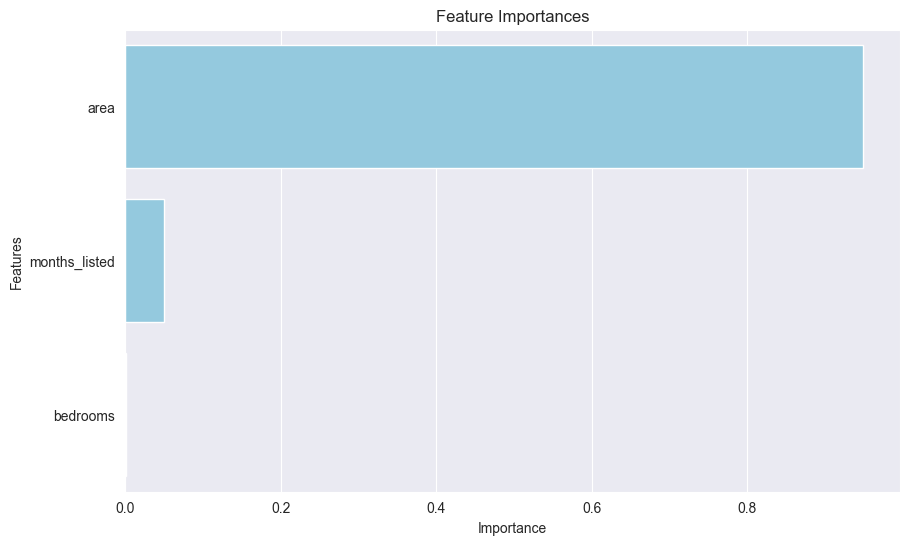

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Select features and target
X = df[['area', 'months_listed', 'bedrooms']]
y = df['sale_price']

# Train the model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
sorted_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_importances.index, color="skyblue")
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

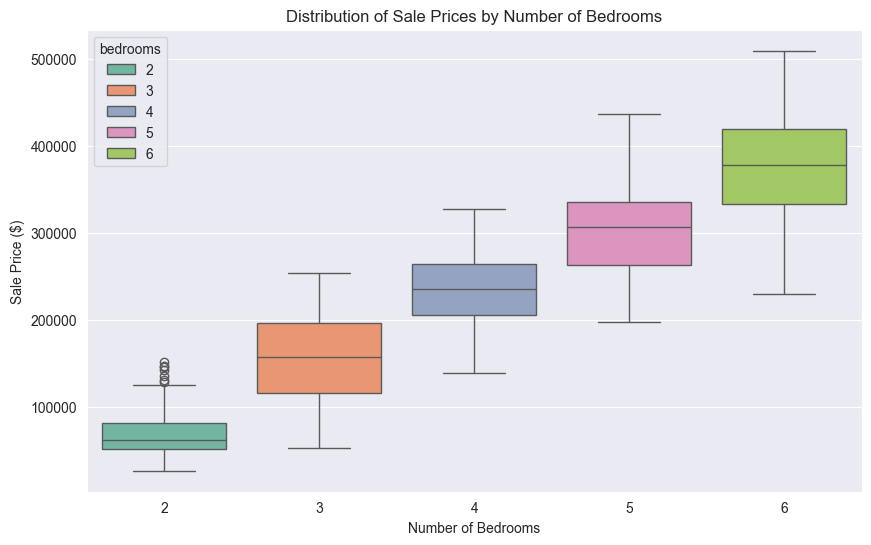

In [17]:
# Bedroom Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='sale_price', data=df, palette='Set2', hue='bedrooms')
plt.title('Distribution of Sale Prices by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Sale Price ($)')
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression

# Regression Analysis
X = df[['bedrooms']]  # Independent variable
y = df['sale_price']  # Dependent variable

# Train the model
model = LinearRegression()
model.fit(X, y)

# Get regression coefficients
coefficients = model.coef_

# Print regression coefficients
print('Regression Coefficients:')
print('Coefficient for Bedrooms:', model.coef_[0])

Regression Coefficients:
Coefficient for Bedrooms: 76324.88059832099
